Extracting the File:

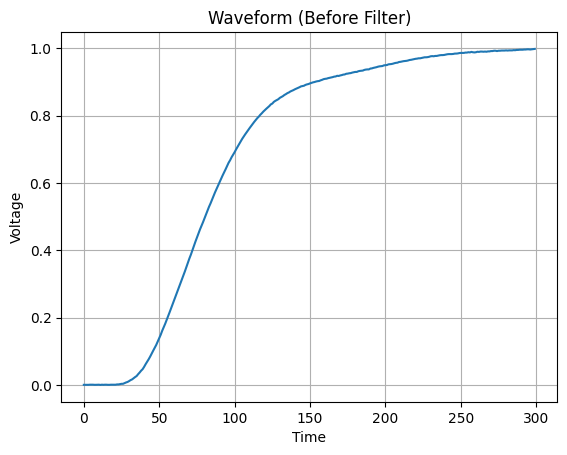

In [246]:
#Plot for given waveform (coeff.npy):
import numpy as np
import matplotlib.pyplot as plt

#given waveform:
coeff = np.load('coeff.npy') #array of values: measured step responce of old output stage

#plot:
plt.plot(coeff)
plt.title('Waveform (Before Filter)')
plt.xlabel('Time') #span 17.5 μs in total
plt.ylabel('Voltage')
plt.grid(True)
plt.show()

Imports:

In [468]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq, ifft

Function for Filter Simulation:

In [469]:
class FilterSimulation():
    
    def filter(self):
        step_response = np.load('coeff.npy') # can be changed to a different filter hardware--this is provided by my boss
        impulse_response = np.diff(step_response, prepend = 0)
        return impulse_response

    def convolution(self, waveform):
        impulse_response = self.filter() # step response = derivative of impulse response
        filtered_waveform = np.convolve(waveform, impulse_response, mode = 'full') # f(t) = h(t) * g(t)
        return filtered_waveform

    def plotting(self, original, filtered_uncompensated, unfiltered_precompensated, filtered_precompensated):
        plt.figure()
        plt.plot(original, label = 'Original')
        plt.plot(filtered_uncompensated, label = 'filtered_uncompensated')
        plt.plot(unfiltered_precompensated, label = 'unfiltered_precompensated', linestyle = '--')
        plt.plot(filtered_precompensated, label = 'filtered_precompensated', linestyle = '--')
        plt.title('Lowpass-Filter Response')
        plt.xlabel('Time in µs')
        plt.ylabel('Voltage')
        plt.grid(True)
        plt.xlim(-10, 1010)
        plt.legend()
        plt.show()

Precompensation Mathematics:

In [507]:
class FilterMath():
    def transfer_function(self, coeff):
        G = fft(coeff)
        # N = len(signal) # number of samples in the input signal
        # freqs = fftfreq(N, d = dt) # fft takes time domain --> frequency domain; returns array length N with corresponding frequencies
        # omega = 2 * np.pi * freqs
        # RC = 1 / (2 * np.pi * cutoff_hz)
        # G = 1 / (1 + 1j * omega * RC)
        return G
    
    def precompensation(self, signal, G):
        f_t = signal
        f_w = fft(f_t)
        min_len = min(len(f_w), len(G))
        f_w = f_w[:min_len]
        g_w = G[:min_len]
        h_w = f_w / G
        h_t = ifft(h_w)
        return h_t

Use Case:

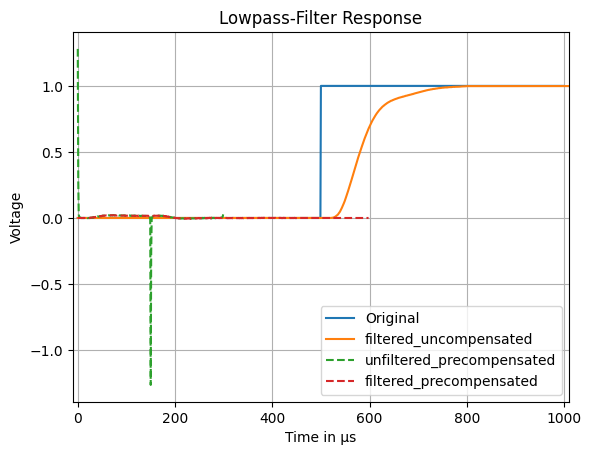

In [509]:
t1 = np.linspace(0, 1, 1000) # starts at 0ms, ends at 1ms (1e-3s), 1000 samples
dt = 0.01 # 1 kHz sampling rate
cutoff_hz = 1000
coeff = np.load('coeff.npy') #array of values: measured step responce of old output stage

original = np.where(t1 > 0.5, 1.0, 0.0)
# original = np.sin(2 * np.pi * 1000 * t1)
# original = t1 / max(t1)

G = FilterMath().transfer_function(coeff)
h_t = FilterMath().precompensation(original, G)

unfiltered_precompensated = np.real(h_t)
filtered_uncompensated = FilterSimulation().convolution(original)
filtered_precompensated = FilterSimulation().convolution(unfiltered_precompensated)

FilterSimulation().plotting(original, filtered_uncompensated, unfiltered_precompensated, filtered_precompensated)